<a href="https://colab.research.google.com/github/Shruti-codes/SHALA2020/blob/master/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.preprocessing import StandardScaler, MinMaxScaler

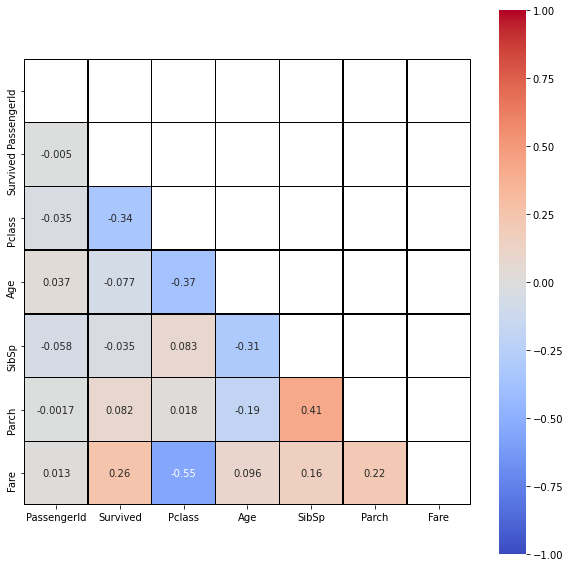

In [0]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')

mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(), annot=True, square= True, mask = mask, cmap = "coolwarm", linewidths=0.5, linecolor = "black", cbar= True, vmin = -1, vmax=1, center = 0)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ab861a20>,
      dtype=object)

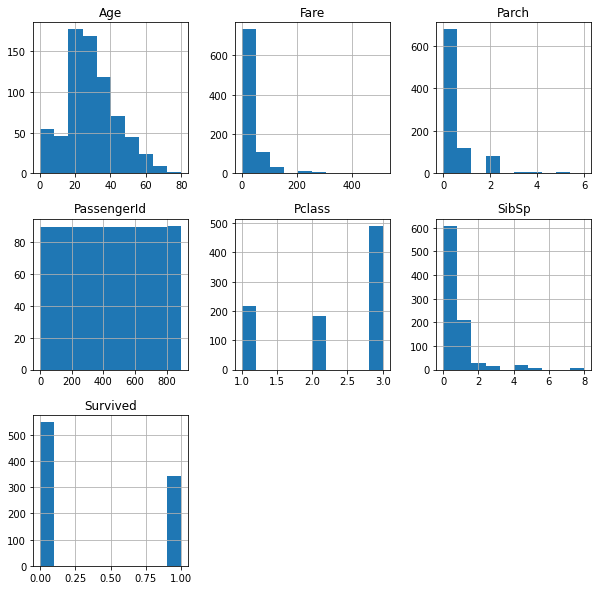

In [0]:
titanic_data.hist(figsize=(10,10))

In [0]:
titanic_data.dropna(subset = ["Embarked"], inplace = True)

imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
titanic_data['Age'] = imp.fit_transform(titanic_data[['Age']])

mapping_embarked = {'C':0, 'Q':1, 'S':2}
titanic_data['Embarked'] = titanic_data['Embarked'].map(mapping_embarked)

In [0]:
print(titanic_data.isna().sum())
titanic_data['Fare'].value_counts()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


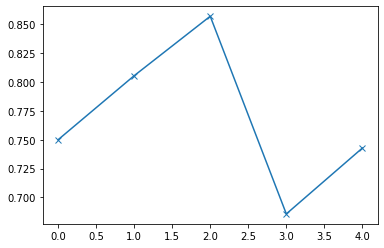

Accuracy (after Cross validation) = 76.83%
Mean Absolute error (Training) = 0.0
Mean Absolute error (Testing) = 0.20786516853932585
Accuracy (Training) = 100.0%
Accuracy (Testing) = 79.0%
Confusion Matrix 
[[372  67]
 [ 81 192]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       439
           1       0.74      0.70      0.72       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



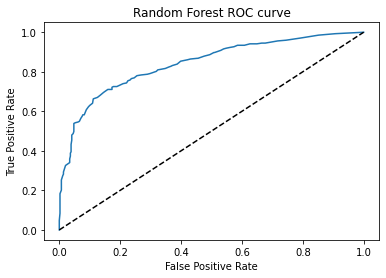

In [0]:
X1 = titanic_data.drop(['Name', "PassengerId", "Ticket", "Cabin", "Survived"], axis = 1)
y = titanic_data['Survived']

#One Hot Encoding
X_cat = X1.copy()
X_cat = X1.select_dtypes(include=['object'])
X_enc = X_cat.copy()
X_enc = pd.get_dummies(X_enc,columns=['Sex'])
X = pd.concat([X1,X_enc], axis = 1)
X = X.drop(['Sex', 'Sex_male'], axis = 1)

# # #scaling the features
# ss = MinMaxScaler()
# X = pd.DataFrame(ss.fit_transform(X), columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 123)
rfc = RandomForestClassifier()
#rfc = xgboost.XGBClassifier()
rfc.fit(X_train, y_train)
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

#Cross-Validation
kfold = KFold(n_splits=5, random_state=123)
res = cross_val_score(rfc, X_train, y_train, cv=kfold)
plt.plot(np.arange(5), res ,'x-', linewidth = 1.5)
plt.show()
print("Accuracy (after Cross validation) = %.2f%%" % (res.mean()*100))


#Performance Metrics
print("Mean Absolute error (Training) = {}".format(mean_absolute_error(y_train, train_pred)))
print("Mean Absolute error (Testing) = {}".format(mean_absolute_error(y_test, test_pred)))
print("Accuracy (Training) = {}%".format(np.round(accuracy_score(y_train, train_pred)*100),2))
print("Accuracy (Testing) = {}%".format(np.round(accuracy_score(y_test, test_pred)*100),2))
print("Confusion Matrix ")
print(confusion_matrix(y_test, test_pred))
print("Classification Report")
print(classification_report(y_test, test_pred))
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs)
plt.plot(fper,tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [0]:

#feature importance
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi

,feature,importance
4,Fare,0.268849
6,Sex_female,0.231958
1,Age,0.228921
0,Pclass,0.130741
2,SibSp,0.052847
5,Embarked,0.047943
3,Parch,0.038740
